In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/Analytics questoria.csv


Исследуем данные по посещяемости сайта Квестории с 24 июня 2016 года по 3 декабря 2019 года. Представление Questoria New в GA, тут больше всего данных.

In [2]:
import pandas as pd
Analytics_questoria = pd.read_csv("../input/Analytics questoria.csv",sep=';')

In [3]:
Analytics_questoria.head()

,Day index,Sessions
0,24.06.2016,2181
1,25.06.2016,1813
2,26.06.2016,1704
3,27.06.2016,2569
4,28.06.2016,2113


In [4]:
# импортируем все необходимые библиотеки в меняем имя файла для удобства
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df=Analytics_questoria

In [5]:
# проверяем типы данных
df.dtypes

Day index    object
Sessions      int64
dtype: object

In [6]:
#Конверитируем колонку Day index в datetime,чтобы можно было с этим работать дальше 
df['Day index'] =  pd.to_datetime(df['Day index'], infer_datetime_format=True)
df.dtypes

Day index    datetime64[ns]
Sessions              int64
dtype: object

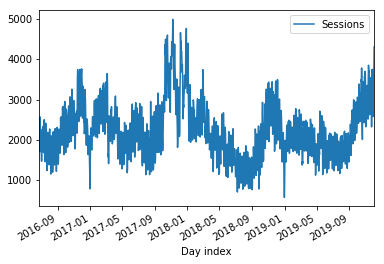

In [7]:
#Строим первый график чтобы визуализировать данные

df.set_index('Day index').plot()

In [8]:
#Подготовим данные для FB propher 
df.columns = ["ds", "y"]
df.head()

,ds,y
0,2016-06-24,2181
1,2016-06-25,1813
2,2016-06-26,1704
3,2016-06-27,2569
4,2016-06-28,2113


In [9]:
df.reset_index(drop=True)

,ds,y
0,2016-06-24,2181
1,2016-06-25,1813
2,2016-06-26,1704
3,2016-06-27,2569
4,2016-06-28,2113
...,...,...
1254,2019-11-30,2583
1255,2019-12-01,3047
1256,2019-12-02,3749
1257,2019-12-03,4307


In [10]:
#Выбрасываем последнюю строку т.к там неверные данные
data = df.drop([1258], axis=0)
data.tail()

,ds,y
1253,2019-11-29,3571
1254,2019-11-30,2583
1255,2019-12-01,3047
1256,2019-12-02,3749
1257,2019-12-03,4307


In [11]:
#Скармиливаем данные Facebook prophet
m1 = Prophet()
m1.fit(data)

In [12]:
#Предсказываем на 365 дней
future1 = m1.make_future_dataframe(periods=365)

In [13]:
# Здесь yhat это предсказываемое значение
forecast1 = m1.predict(future1)
forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1618,2020-11-28,3561.077564,2837.334908,4204.447326
1619,2020-11-29,3621.855320,2910.309527,4288.383885
1620,2020-11-30,4228.371778,3559.087286,4861.173803
1621,2020-12-01,4318.357067,3649.880172,5019.317983
1622,2020-12-02,4391.757330,3706.261901,5048.892393


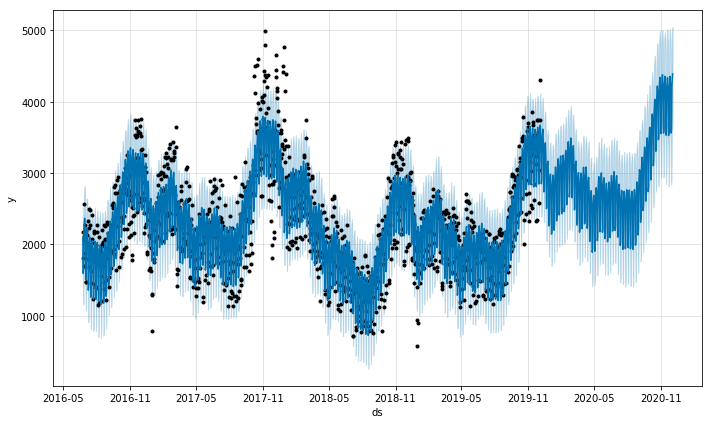

In [14]:
#Строим график посещаемости сайта до ноября 2020 года
m1.plot(forecast1);

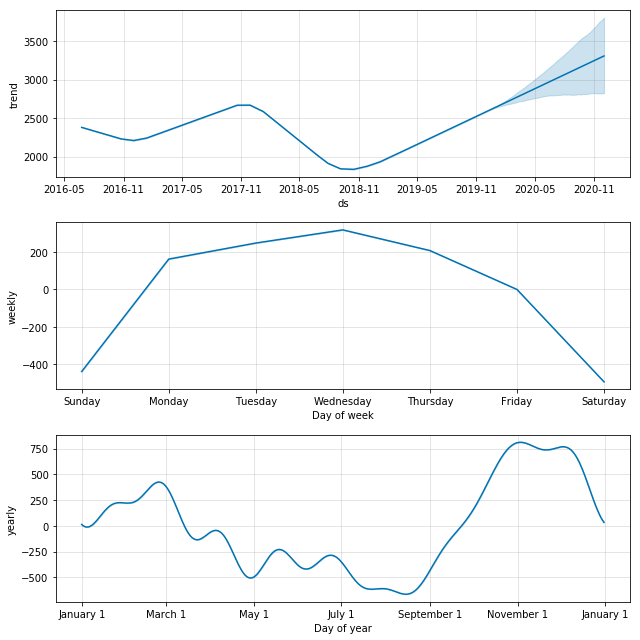

In [15]:
#Построим графики трендов 
m1.plot_components(forecast1);